<a href="https://colab.research.google.com/github/Aditya3523/Full-Stack-Development/blob/main/DSE_Research_Paper_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/NCHS_-_Leading_Causes_of_Death__United_States.csv")
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     10868 non-null  int64 
 1   113 Cause Name           10868 non-null  object
 2   Cause Name               10868 non-null  object
 3   State                    10868 non-null  object
 4   Deaths                   10868 non-null  object
 5   Age-adjusted Death Rate  10868 non-null  object
dtypes: int64(1), object(5)
memory usage: 509.6+ KB


In [ ]:
df['Deaths'] = df['Deaths'].str.replace(',', '').astype(int)
df['Age-adjusted Death Rate'] = df['Age-adjusted Death Rate'].str.replace(',', '').astype(float)

In [ ]:
print("No. of Null Values:",df.isnull().sum().sum())
print("No. of Duplicated Rows:",df.duplicated().sum())

No. of Null Values: 0
No. of Duplicated Rows: 0


In [ ]:
us_df=df[(df['State'] == 'United States') & (df['113 Cause Name'] != 'All Causes')]
us_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
104,2017,Alzheimer's disease (G30),Alzheimer's disease,United States,121404,31.0
156,2017,Cerebrovascular diseases (I60-I69),Stroke,United States,146383,37.6
208,2017,Chronic lower respiratory diseases (J40-J47),CLRD,United States,160201,40.9
260,2017,Diabetes mellitus (E10-E14),Diabetes,United States,83564,21.5


In [ ]:
print("Leading Cause of Death in Each Year in the US:")
for year in range(1999, 2018):
    yearly_data = us_df[us_df['Year'] == year]
    max_deaths = yearly_data['Deaths'].max()
    leading_causes = yearly_data[(yearly_data['Deaths'] == max_deaths)]['113 Cause Name'].tolist()
    print(f"{year}:")
    print(f"Leading Cause: {', '.join(leading_causes)}")
    print(f"No. of Deaths: {max_deaths}")

Leading Cause of Death in Each Year in the US:
1999:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 725192
2000:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 710760
2001:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 700142
2002:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 696947
2003:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 685089
2004:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 652486
2005:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 652091
2006:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 631636
2007:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 616067
2008:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 616828
2009:
Leading Cause: Diseases of heart (I00-I09,I11,I13,I20-I51)
No. of Deaths: 599

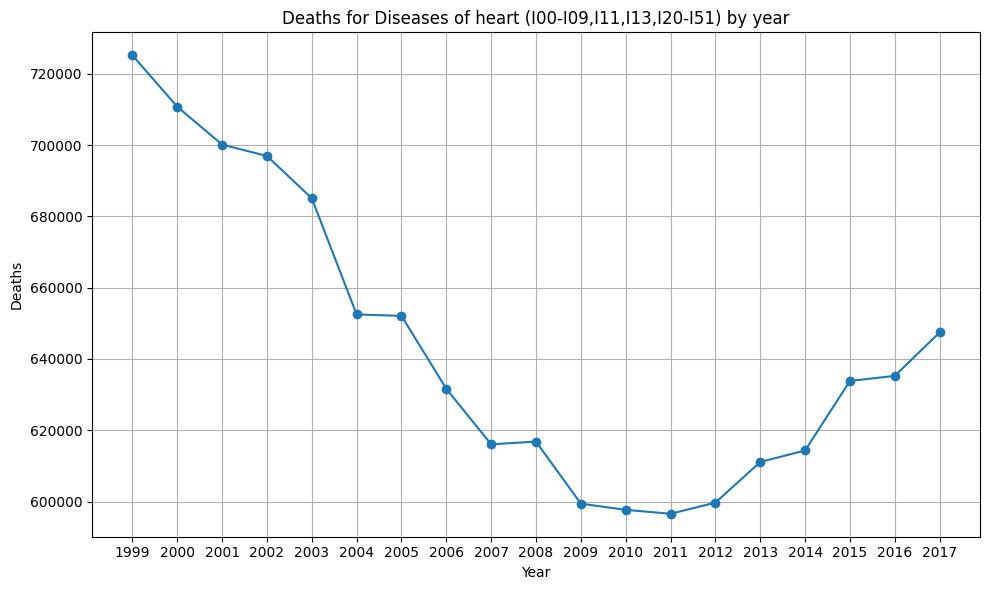

In [ ]:
deaths_heart_disease = us_df[us_df['113 Cause Name'] == 'Diseases of heart (I00-I09,I11,I13,I20-I51)']
yearly_deaths = deaths_heart_disease.groupby('Year')['Deaths'].first().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths['Year'].astype(str), yearly_deaths['Deaths'], marker='o', linestyle='-')
plt.title('Deaths for Diseases of heart (I00-I09,I11,I13,I20-I51) by year')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

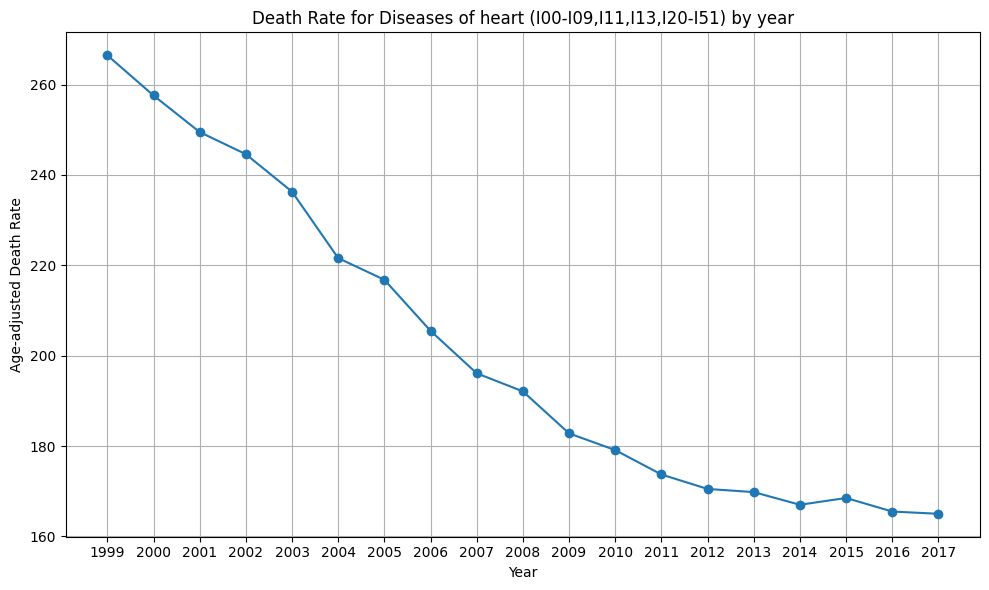

In [ ]:
rate_heart_disease = us_df[us_df['113 Cause Name'] == 'Diseases of heart (I00-I09,I11,I13,I20-I51)']
yearly_death_rates = rate_heart_disease.groupby('Year')['Age-adjusted Death Rate'].first().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_death_rates['Year'].astype(str), yearly_death_rates['Age-adjusted Death Rate'], marker='o', linestyle='-')
plt.title('Death Rate for Diseases of heart (I00-I09,I11,I13,I20-I51) by year')
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Second Leading Cause of Death in Each Year in the US:")
for year in range(1999, 2018):
    yearly_data = us_df[us_df['Year'] == year]
    sorted_yearly_data = yearly_data.sort_values(by='Deaths', ascending=False)
    second_max_deaths = sorted_yearly_data.iloc[1]['Deaths']
    second_leading_causes = sorted_yearly_data[sorted_yearly_data['Deaths'] == second_max_deaths]['113 Cause Name'].tolist()
    print(f"{year}:")
    print(f"Second Leading Cause: {', '.join(second_leading_causes)}")
    print(f"No. of Deaths: {second_max_deaths}")

Second Leading Cause of Death in Each Year in the US:
1999:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 549838
2000:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 553091
2001:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 553768
2002:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 557271
2003:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 556902
2004:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 553888
2005:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 559312
2006:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 559888
2007:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 562875
2008:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 565469
2009:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of Deaths: 567628
2010:
Second Leading Cause: Malignant neoplasms (C00-C97)
No. of D

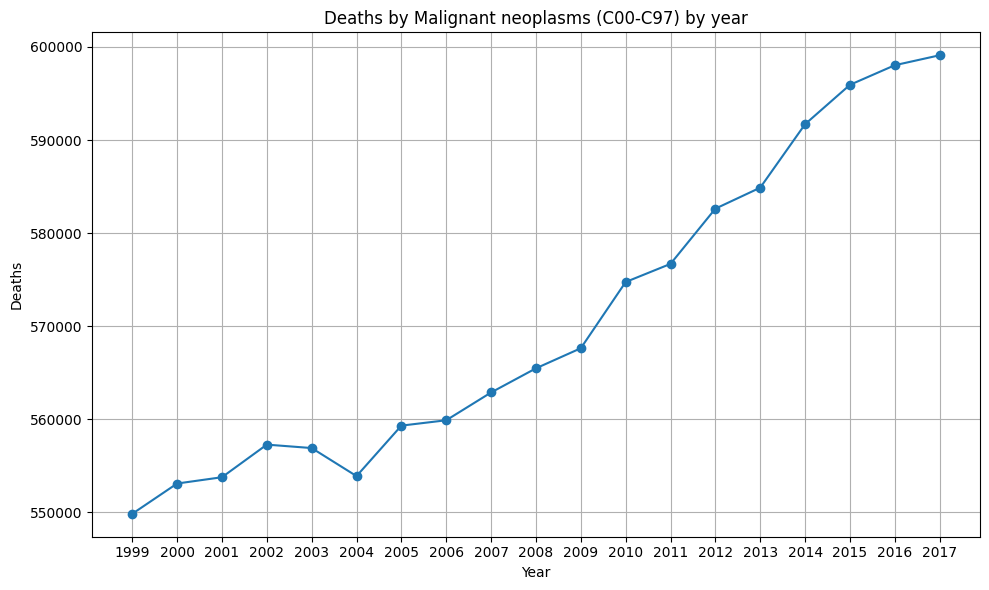

In [ ]:
deaths_cancer = us_df[us_df['113 Cause Name'] == 'Malignant neoplasms (C00-C97)']
yearly_deaths = deaths_cancer.groupby('Year')['Deaths'].first().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths['Year'].astype(str), yearly_deaths['Deaths'], marker='o', linestyle='-')
plt.title('Deaths by Malignant neoplasms (C00-C97) by year')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

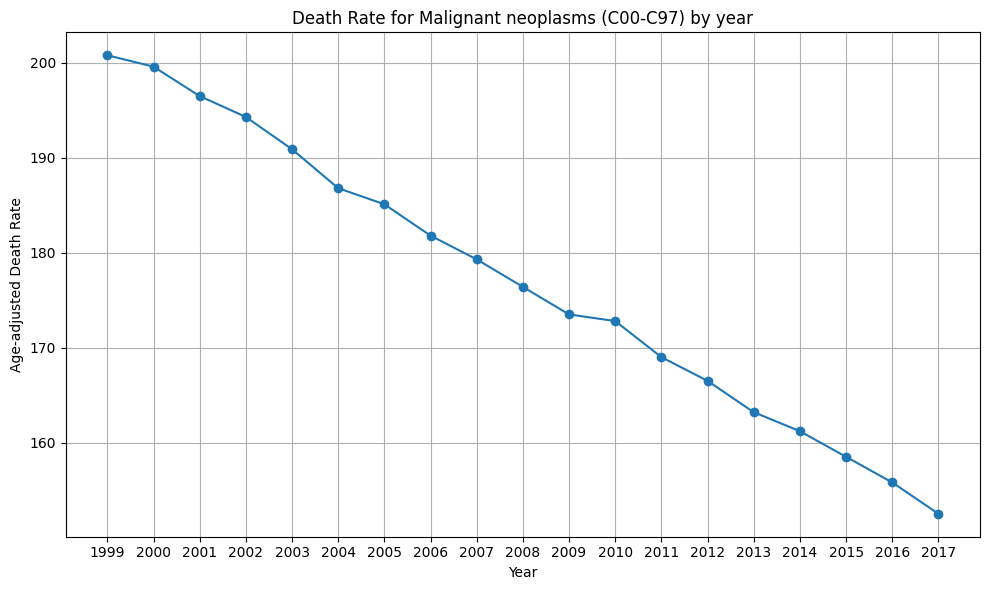

In [ ]:
rate_cancer_deaths = us_df[us_df['113 Cause Name'] == 'Malignant neoplasms (C00-C97)']
yearly_death_rates = rate_cancer_deaths.groupby('Year')['Age-adjusted Death Rate'].first().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_death_rates['Year'].astype(str), yearly_death_rates['Age-adjusted Death Rate'], marker='o', linestyle='-')
plt.title('Death Rate for Malignant neoplasms (C00-C97) by year')
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Third Leading Cause of Death in Each Year in the US:")
for year in range(1999, 2018):
    yearly_data = us_df[us_df['Year'] == year]
    sorted_yearly_data = yearly_data.sort_values(by='Deaths', ascending=False)
    third_max_deaths = sorted_yearly_data.iloc[2]['Deaths']  # Using index 2 for the third leading cause
    third_leading_causes = sorted_yearly_data[sorted_yearly_data['Deaths'] == third_max_deaths]['113 Cause Name'].tolist()
    print(f"{year}:")
    print(f"Third Leading Cause: {', '.join(third_leading_causes)}")
    print(f"No. of Deaths: {third_max_deaths}")

Third Leading Cause of Death in Each Year in the US:
1999:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 167366
2000:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 167661
2001:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 163538
2002:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 162672
2003:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 157689
2004:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 150074
2005:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 143579
2006:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 137119
2007:
Third Leading Cause: Cerebrovascular diseases (I60-I69)
No. of Deaths: 135952
2008:
Third Leading Cause: Chronic lower respiratory diseases (J40-J47)
No. of Deaths: 141090
2009:
Third Leading Cause: Chronic lower respiratory diseases (J40-J47)
No. of Deaths: 137353
201

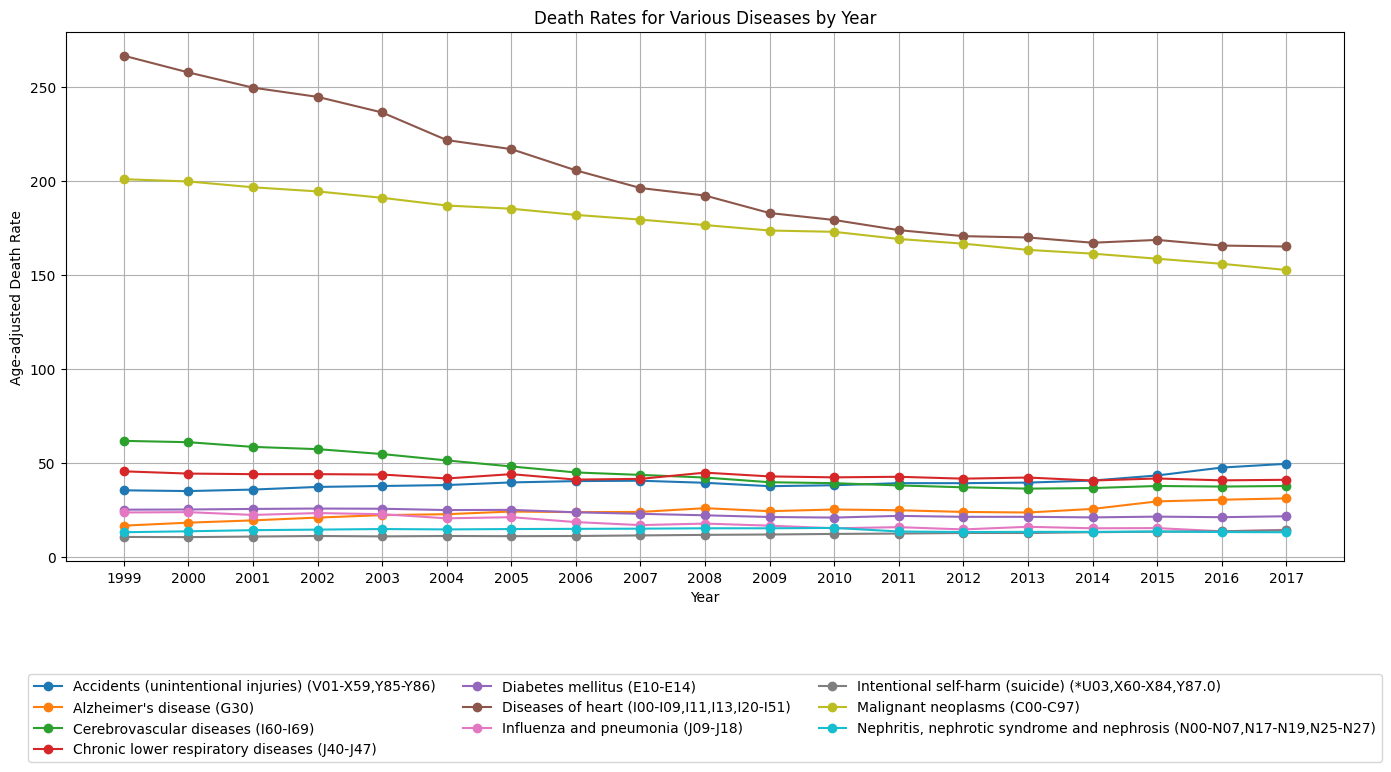

In [ ]:
list_of_diseases = us_df['113 Cause Name'].unique()
plt.figure(figsize=(15, 8))

for disease in list_of_diseases:
    disease_data = us_df[us_df['113 Cause Name'] == disease]
    yearly_death_rates = disease_data.groupby('Year')['Age-adjusted Death Rate'].first().reset_index()
    plt.plot(yearly_death_rates['Year'].astype(str), yearly_death_rates['Age-adjusted Death Rate'], marker='o', label=disease)

plt.title('Death Rates for Various Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()

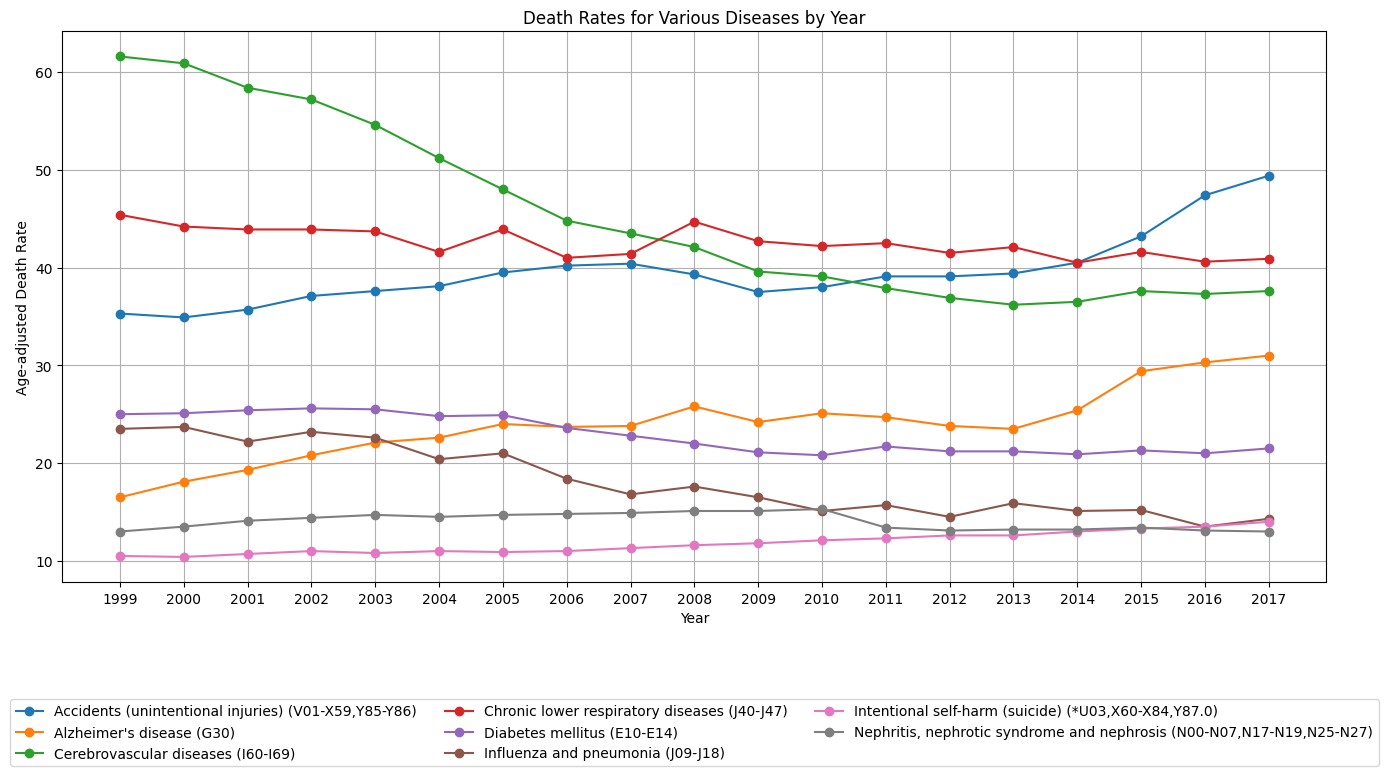

In [ ]:
list_of_diseases = us_df['113 Cause Name'].unique()
excluded_diseases = ["Diseases of heart (I00-I09,I11,I13,I20-I51)", "Malignant neoplasms (C00-C97)"]
list_of_diseases = [disease for disease in list_of_diseases if disease not in excluded_diseases]
plt.figure(figsize=(15, 8))

for disease in list_of_diseases:
    disease_data = us_df[us_df['113 Cause Name'] == disease]
    yearly_death_rates = disease_data.groupby('Year')['Age-adjusted Death Rate'].first().reset_index()
    plt.plot(yearly_death_rates['Year'].astype(str), yearly_death_rates['Age-adjusted Death Rate'], marker='o', label=disease)

plt.title('Death Rates for Various Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
statistics = us_df.groupby('113 Cause Name')['Age-adjusted Death Rate'].agg(['mean', 'median', lambda x: x.mode()[0] if len(x.mode()) > 0 else None]).reset_index()
statistics.columns = ['Disease', 'Mean', 'Median', 'Mode']
statistics = statistics.sort_values(by='Median', ascending=False).reset_index(drop=True)
print(statistics)

                                             Disease        Mean  Median  \
0        Diseases of heart (I00-I09,I11,I13,I20-I51)  201.500000   192.1   
1                      Malignant neoplasms (C00-C97)  177.078947   176.4   
2       Chronic lower respiratory diseases (J40-J47)   42.542105    42.2   
3                 Cerebrovascular diseases (I60-I69)   45.315789    42.1   
4  Accidents (unintentional injuries) (V01-X59,Y8...   39.563158    39.1   
5                          Alzheimer's disease (G30)   23.900000    23.8   
6                        Diabetes mellitus (E10-E14)   22.915789    22.0   
7                  Influenza and pneumonia (J09-J18)   18.168421    16.8   
8  Nephritis, nephrotic syndrome and nephrosis (N...   14.026316    14.1   
9  Intentional self-harm (suicide) (*U03,X60-X84,...   11.810526    11.6   

    Mode  
0  165.0  
1  152.5  
2   43.9  
3   37.6  
4   39.1  
5   23.8  
6   21.2  
7   15.1  
8   13.0  
9   11.0  


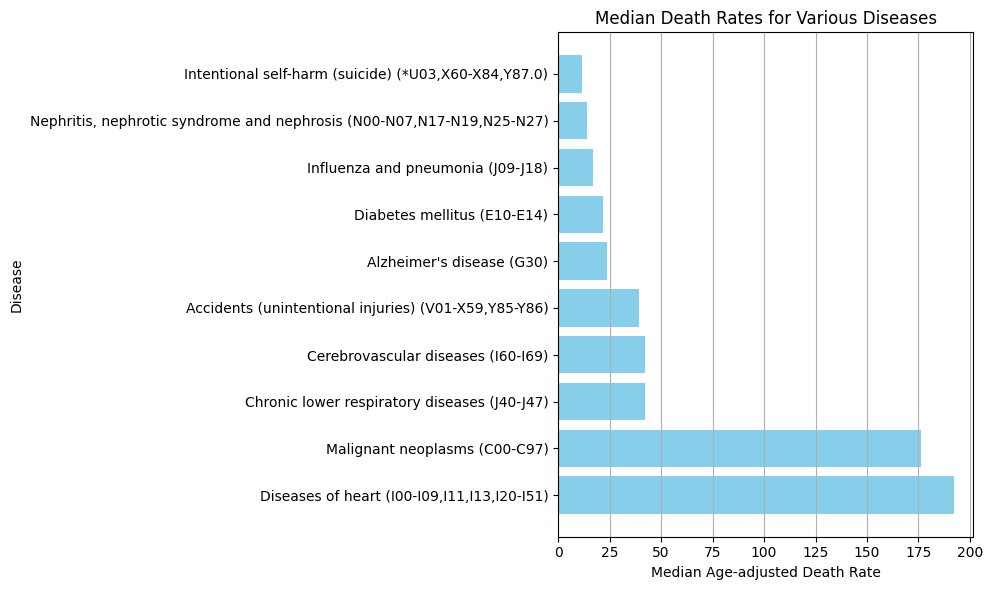

In [ ]:
plt.figure(figsize=(10, 6))

plt.barh(statistics['Disease'], statistics['Median'], color='skyblue')
plt.xlabel('Median Age-adjusted Death Rate')
plt.ylabel('Disease')
plt.title('Median Death Rates for Various Diseases')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
                                             Disease  Median
0  Intentional self-harm (suicide) (*U03,X60-X84,...    11.6
1  Nephritis, nephrotic syndrome and nephrosis (N...    14.1
2                  Influenza and pneumonia (J09-J18)    16.8
3                        Diabetes mellitus (E10-E14)    22.0
4                          Alzheimer's disease (G30)    23.8

Cluster 2:
                                       Disease  Median
8                Malignant neoplasms (C00-C97)   176.4
9  Diseases of heart (I00-I09,I11,I13,I20-I51)   192.1

Cluster 3:
                                             Disease  Median
5  Accidents (unintentional injuries) (V01-X59,Y8...    39.1
6                 Cerebrovascular diseases (I60-I69)    42.1
7       Chronic lower respiratory diseases (J40-J47)    42.2



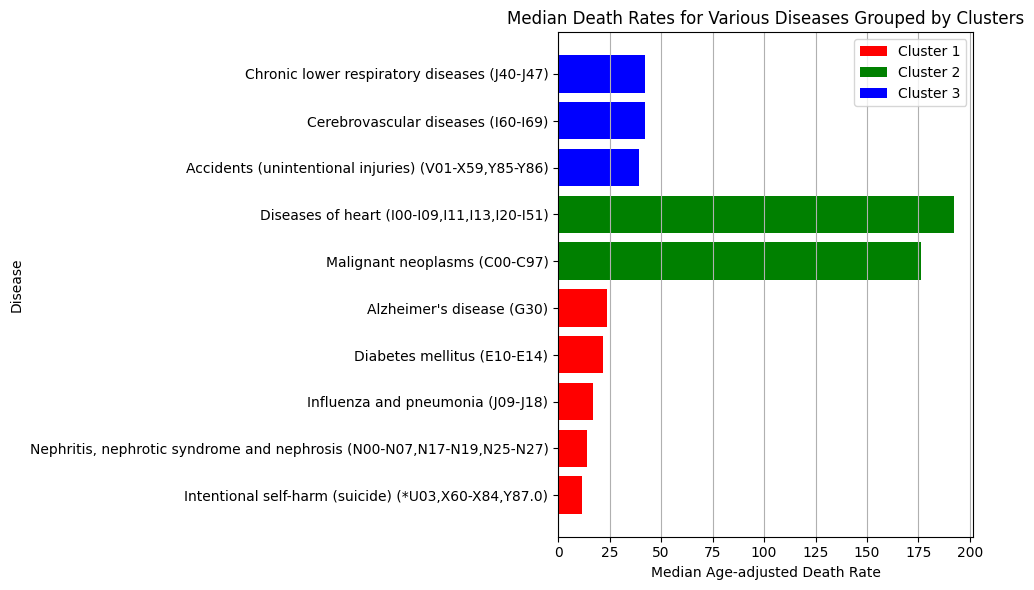

In [ ]:
# Selecting the feature (median death rates)
X = statistics['Median'].values.reshape(-1, 1)

# Defining the number of clusters/groups
n_clusters = 3

# Creating KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting the cluster centers
cluster_centers = kmeans.cluster_centers_

# Assigning each disease to a cluster
statistics['Cluster'] = kmeans.labels_

# Sorting the statistics DataFrame by median column
statistics = statistics.sort_values(by='Median').reset_index(drop=True)

for cluster in range(n_clusters):
    print(f"Cluster {cluster+1}:")
    print(statistics[statistics['Cluster'] == cluster][['Disease', 'Median']])
    print()

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for cluster in range(n_clusters):
    plt.barh(statistics[statistics['Cluster'] == cluster]['Disease'], statistics[statistics['Cluster'] == cluster]['Median'], color=colors[cluster], label=f'Cluster {cluster+1}')

plt.xlabel('Median Age-adjusted Death Rate')
plt.ylabel('Disease')
plt.title('Median Death Rates for Various Diseases Grouped by Clusters')
plt.legend()
plt.grid(axis='x')

plt.tight_layout()
plt.show()

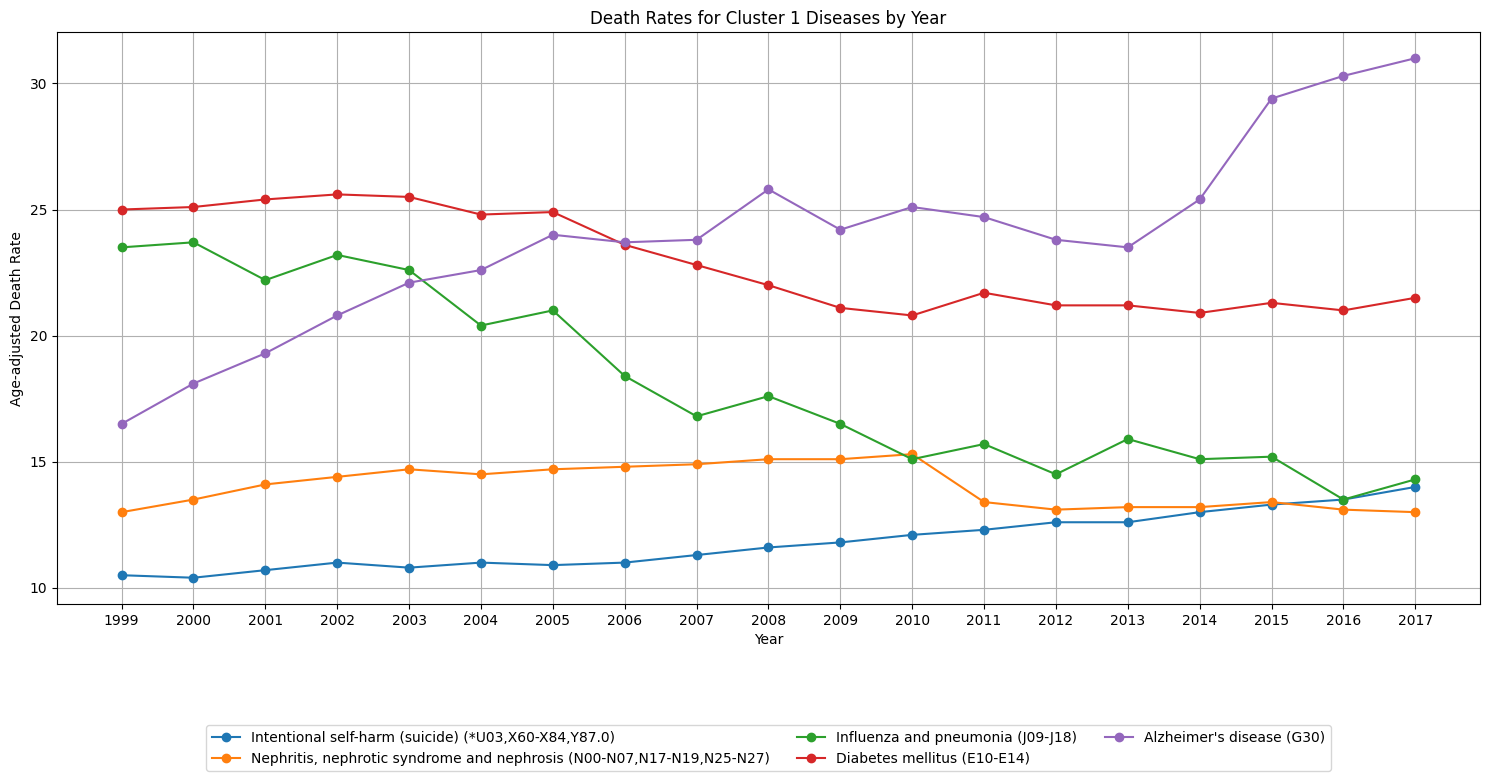

In [ ]:
cluster_1_diseases = statistics[statistics['Cluster'] == 0]['Disease']
plt.figure(figsize=(15, 8))

for disease in cluster_1_diseases:
    disease_data = us_df[us_df['113 Cause Name'] == disease]
    yearly_death_rates = disease_data.groupby('Year')['Age-adjusted Death Rate'].first().reset_index()
    plt.plot(yearly_death_rates['Year'].astype(str), yearly_death_rates['Age-adjusted Death Rate'], marker='o', label=disease)

plt.title('Death Rates for Cluster 1 Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()

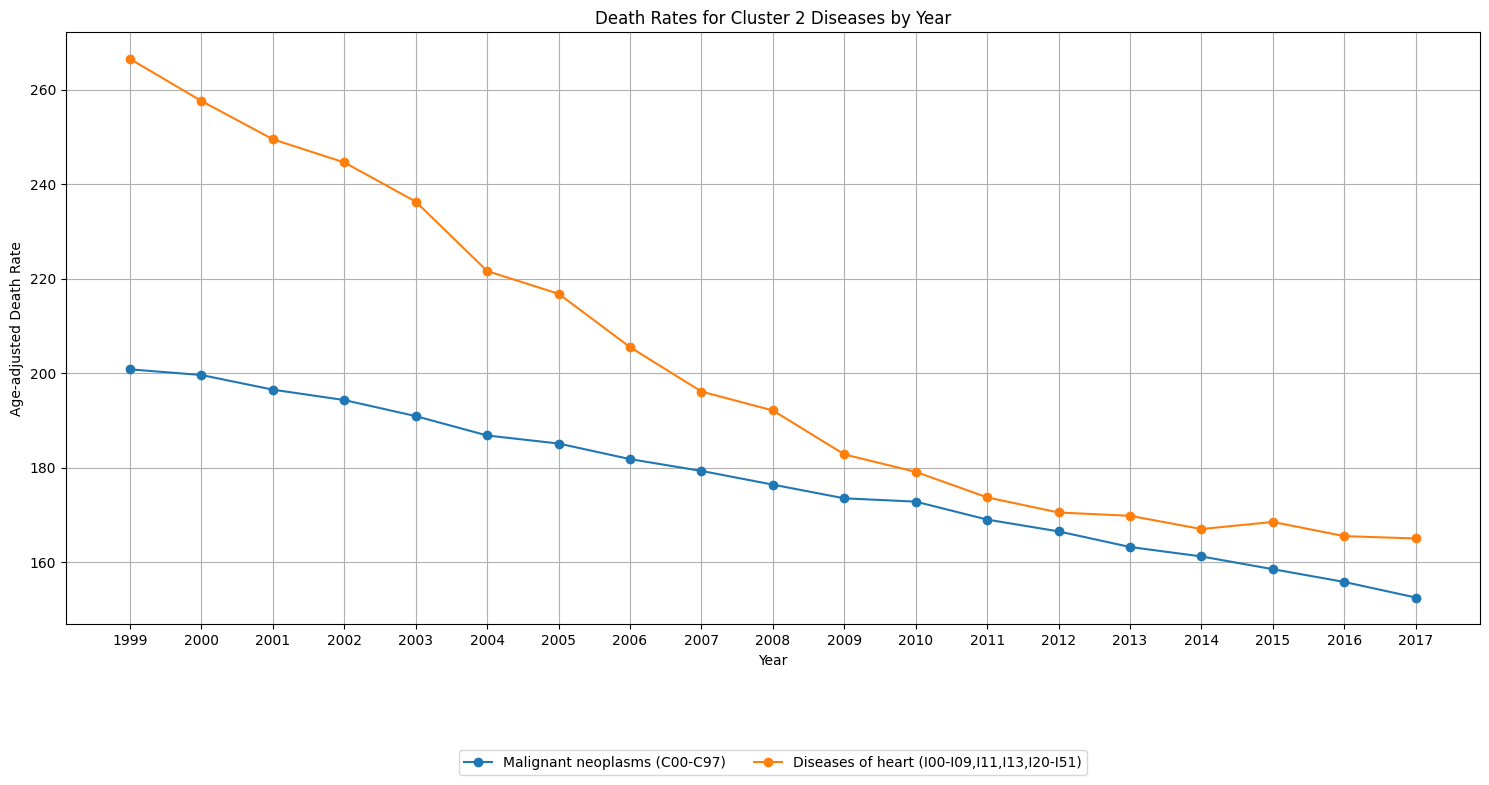

In [ ]:
cluster_2_diseases = statistics[statistics['Cluster'] == 1]['Disease']
plt.figure(figsize=(15, 8))

for disease in cluster_2_diseases:
    disease_data = us_df[us_df['113 Cause Name'] == disease]
    yearly_death_rates = disease_data.groupby('Year')['Age-adjusted Death Rate'].first().reset_index()
    plt.plot(yearly_death_rates['Year'].astype(str), yearly_death_rates['Age-adjusted Death Rate'], marker='o', label=disease)

plt.title('Death Rates for Cluster 2 Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()

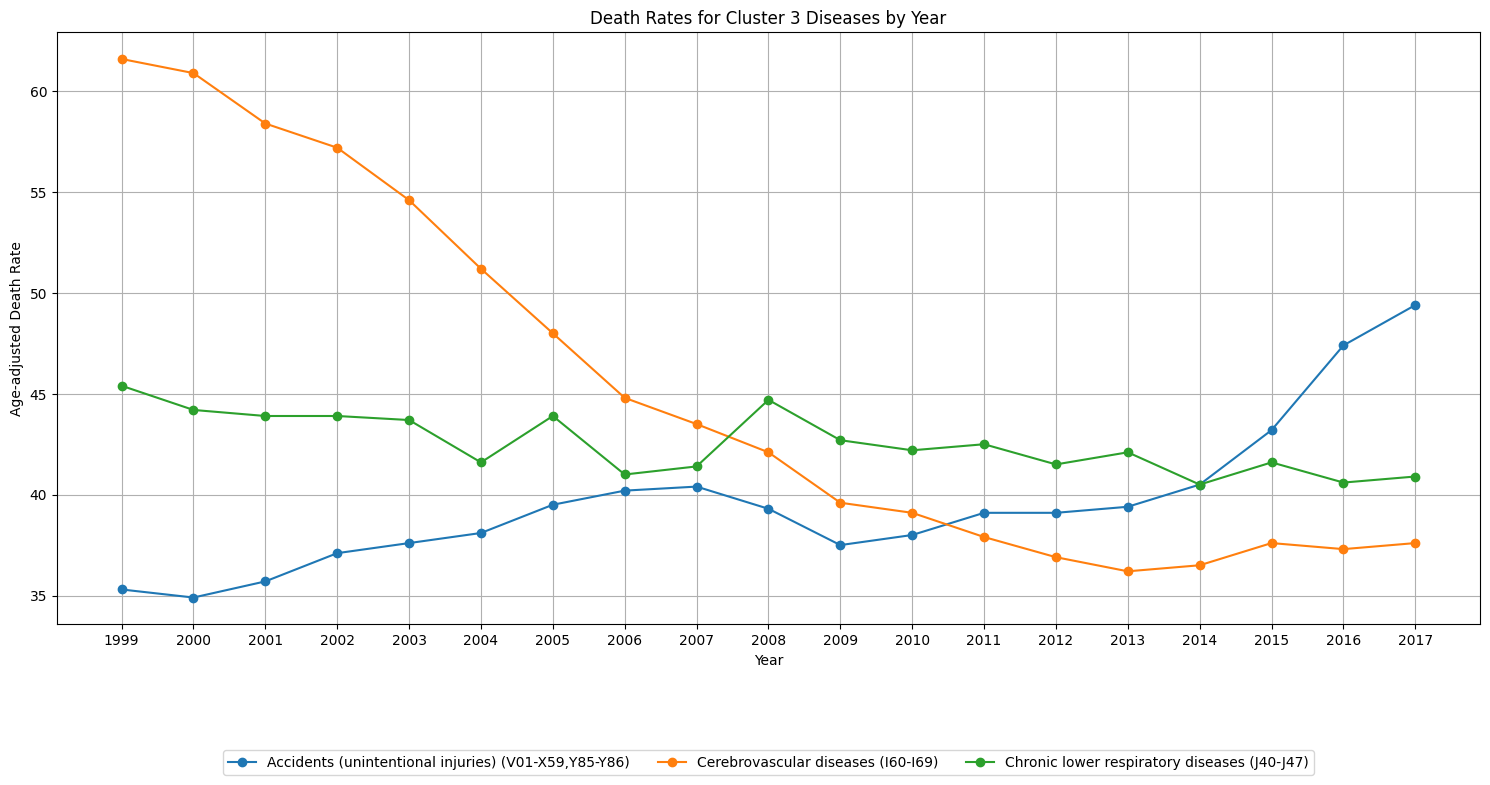

In [ ]:
cluster_3_diseases = statistics[statistics['Cluster'] == 2]['Disease']
plt.figure(figsize=(15, 8))

for disease in cluster_3_diseases:
    disease_data = us_df[us_df['113 Cause Name'] == disease]
    yearly_death_rates = disease_data.groupby('Year')['Age-adjusted Death Rate'].first().reset_index()
    plt.plot(yearly_death_rates['Year'].astype(str), yearly_death_rates['Age-adjusted Death Rate'], marker='o', label=disease)

plt.title('Death Rates for Cluster 3 Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
total_deaths_yearly = us_df.groupby('Year')['Deaths'].sum()

probabilities = us_df.groupby(['Year', '113 Cause Name'])['Deaths'].sum() / total_deaths_yearly
probabilities = probabilities.reset_index()

print(probabilities)

     Year                                     113 Cause Name    Deaths
0    1999  Accidents (unintentional injuries) (V01-X59,Y8...  0.051348
1    1999                          Alzheimer's disease (G30)  0.023368
2    1999                 Cerebrovascular diseases (I60-I69)  0.087818
3    1999       Chronic lower respiratory diseases (J40-J47)  0.065159
4    1999                        Diabetes mellitus (E10-E14)  0.035889
..    ...                                                ...       ...
185  2017        Diseases of heart (I00-I09,I11,I13,I20-I51)  0.311048
186  2017                  Influenza and pneumonia (J09-J18)  0.026746
187  2017  Intentional self-harm (suicide) (*U03,X60-X84,...  0.022663
188  2017                      Malignant neoplasms (C00-C97)  0.287821
189  2017  Nephritis, nephrotic syndrome and nephrosis (N...  0.024325

[190 rows x 3 columns]


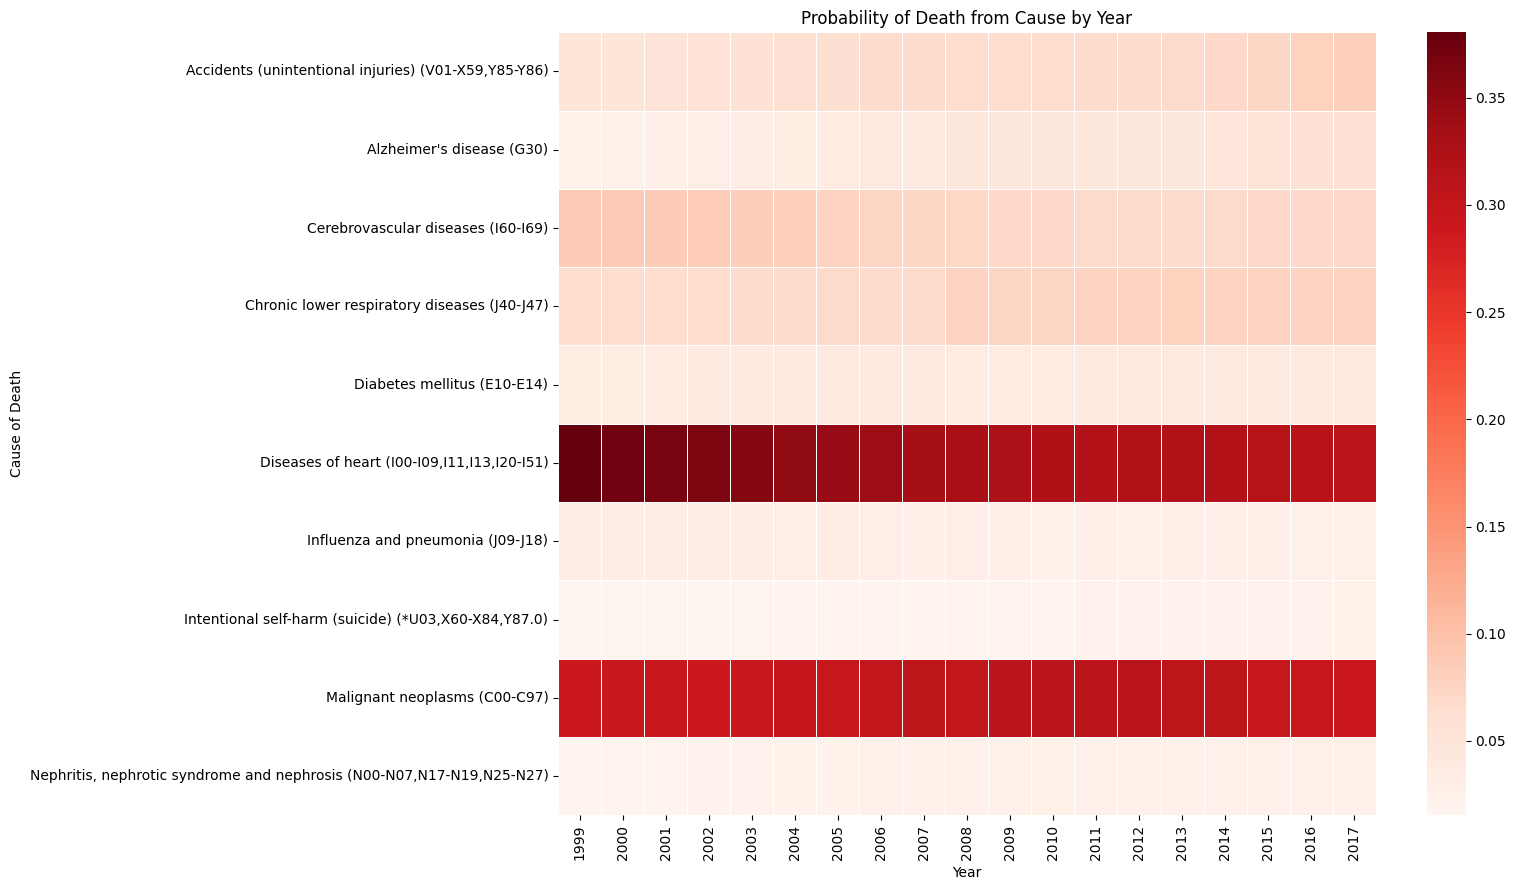

In [ ]:
heatmap_data = probabilities.pivot(index='113 Cause Name', columns='Year', values='Deaths')

plt.figure(figsize=(16, 9))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.5)
plt.title('Probability of Death from Cause by Year')
plt.xlabel('Year')
plt.ylabel('Cause of Death')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()